In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/78.2 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

In [4]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

  0%|          | 0.00/6.79M [00:00<?, ?B/s]

In [5]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.9M/14.9M [00:00<00:00, 140MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 86.8MB/s]
Dataset download success ✅ (0.5s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 1086.44it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6NcHIgpuJljIHk4Zrmey")
project = rf.workspace("yolov5-bzr4l").project("surface-defects-on-concrete-structures-4bwdf")
dataset = project.version(1).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Surface-defects-on-concrete-structures-1 in yolov7pytorch:: 100%|██████████| 7930/7930 [00:03<00:00, 2050.00it/s]


In [8]:
%cat {dataset.location}/data.yaml

names:
- crack
- rebar
- spall
nc: 3
roboflow:
  license: CC BY 4.0
  project: surface-defects-on-concrete-structures-4bwdf
  url: https://universe.roboflow.com/project/surface-defects-on-concrete-structures-4bwdf/dataset/1
  version: 1
  workspace: project
test: ../test/images
train: Surface-defects-on-concrete-structures-1/train/images
val: Surface-defects-on-concrete-structures-1/valid/images


/content/yolov5
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Surface-defects-on-concrete-structures-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

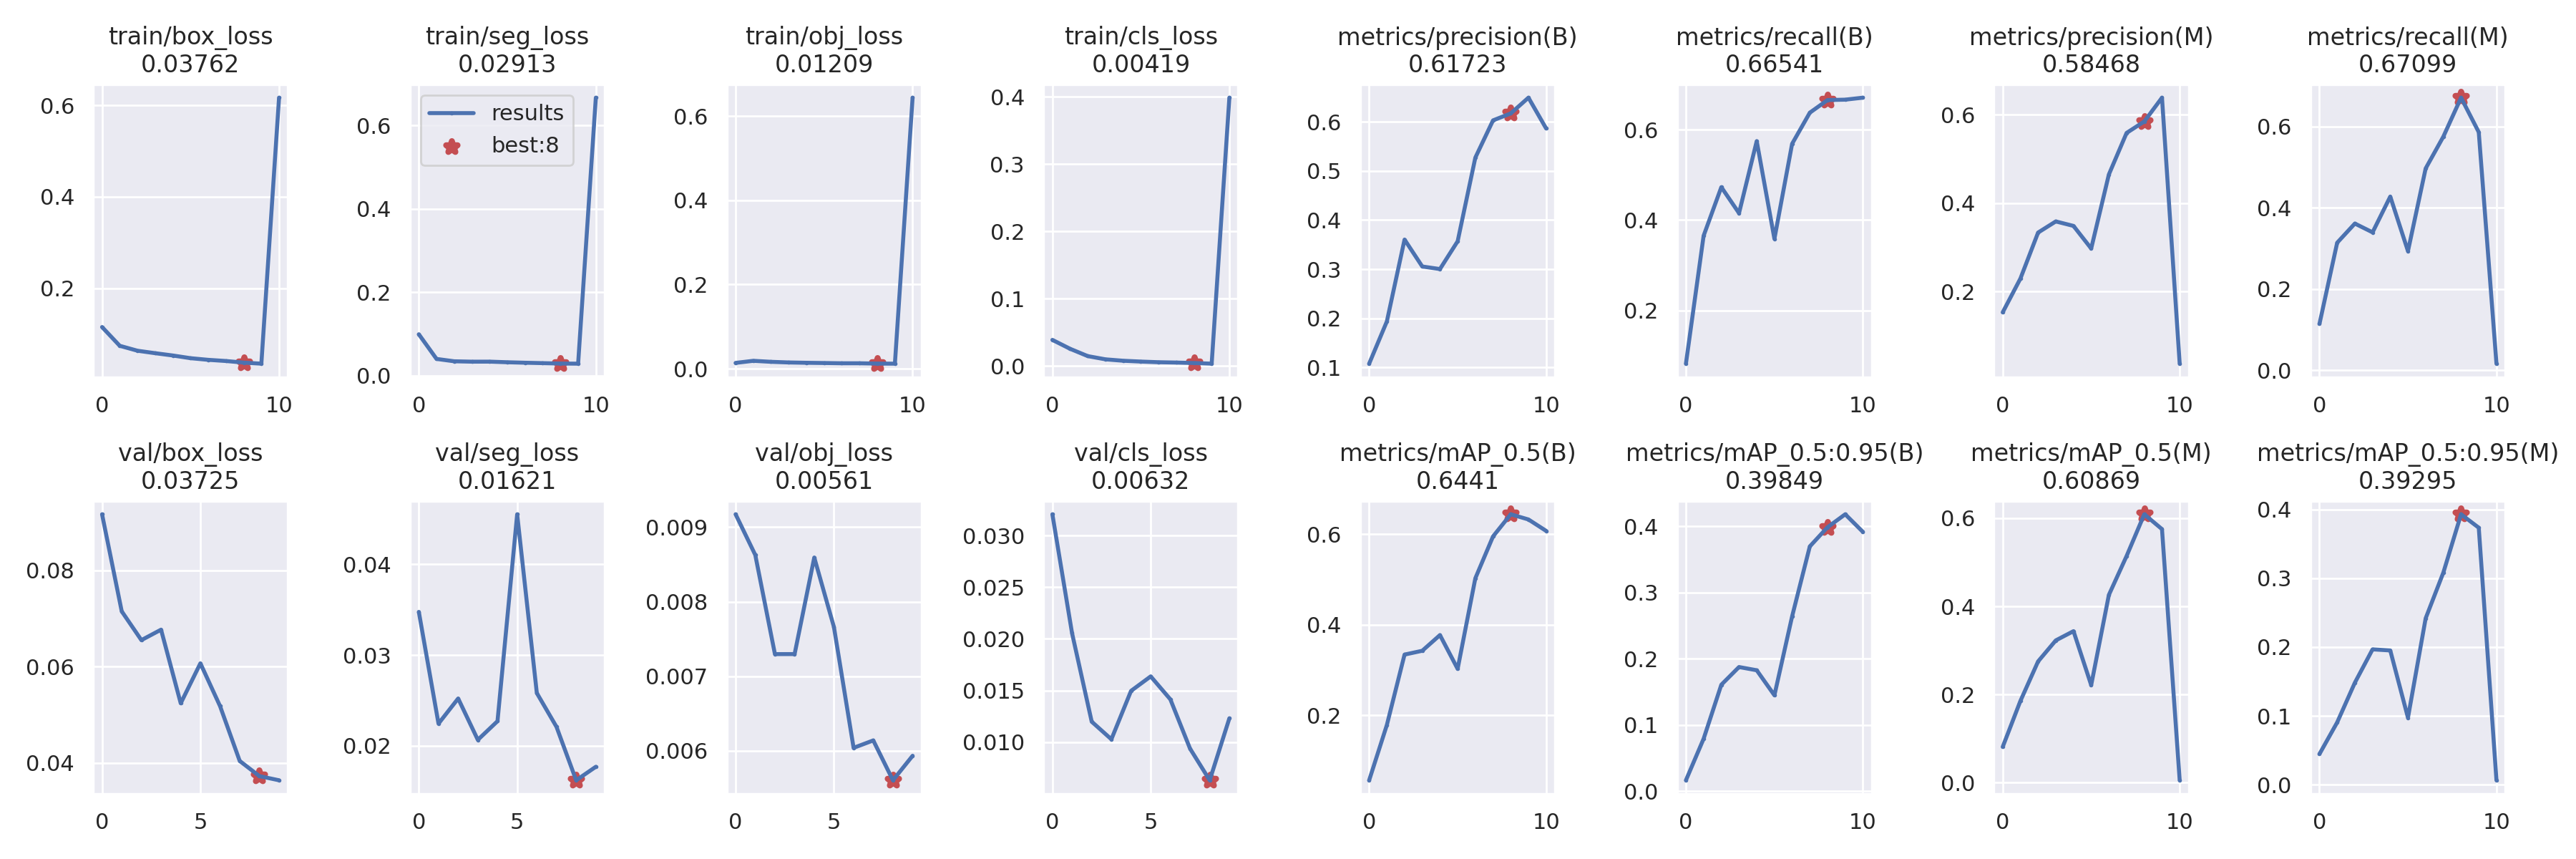

In [9]:
%cd {HOME}/yolov5 
!python segment/train.py --img 320 --batch 128 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

In [11]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Surface-defects-on-concrete-structures-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Surface-defects-on-concrete-structures-1/valid/labels.cache... 330 images, 63 backgrounds, 0 corrupt: 100% 330/330 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:09<00:00,  1.10it/s]
             

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Surface-defects-on-concrete-structures-1/test/images/000137_jpg.rf.7e9d6a8bab966b42cbc9303c5e6223c0.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Surface-defects-on-concrete-structures-1/test/images/000137_jpg.rf.7e9d6a8bab966b42cbc9303c5e6223c0.jpg: 320x320 3 spalls, 8.4ms


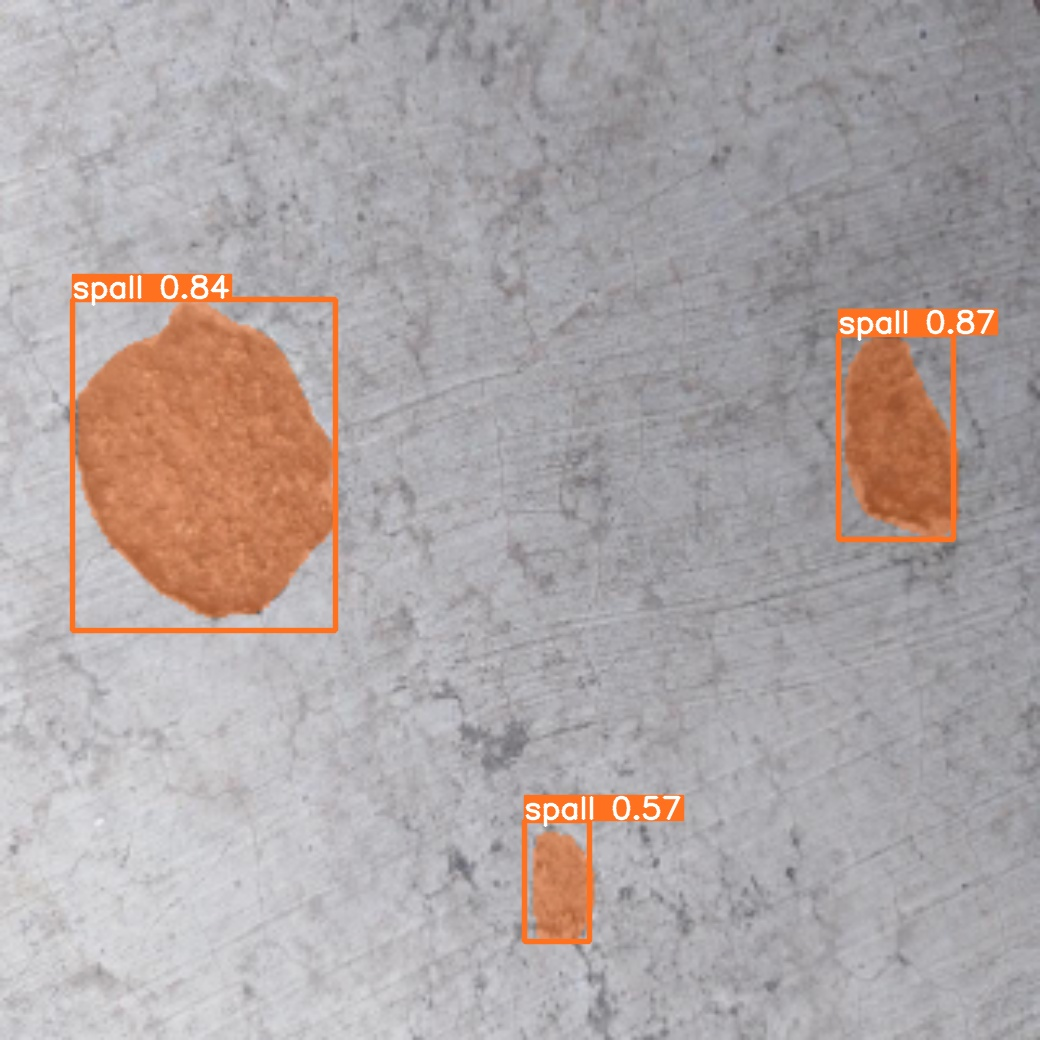

In [14]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

In [16]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a 
#directory you provide (by uploading to the colab environment, for example)
import requests
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_links = [
    "https://perfectconcretecare.com.au/wp-content/uploads/2020/01/crack-3364707_1920.jpg", 
    "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Qew_bruecke_nf_beton_kaputt_34_von_46.jpg/1024px-Qew_bruecke_nf_beton_kaputt_34_von_46.jpg", 
    "https://www.hpdconsult.com/wp-content/uploads/2021/06/spalling_concrete.png",
    ]

for i,link in enumerate(image_links):
  img_data = requests.get(link).content
  with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
    handler.write(img_data)